# Workshop 6: Vector Semantics and Embeddings using word2vec

In natural language processing, we represent each word as a vector consisting of numbers.
The vector encodes the meaning of the word. These numbers (or weights) for each word are learned using various machine
learning models. Rather than make you code the
machine learning models from scratch, we will show you how to use them. In the real world, you can always load the
trained word vectors, and you will almost never have to train them from scratch. In this workshop, you will:

- Predict analogies between words.
- Use PCA to reduce the dimensionality of the word embeddings and plot them in two dimensions.
- Compare word embeddings by using a similarity measure (the cosine similarity).
- Understand how these vector space models work.

## Word embeddings
When you're dealing with words in text, you end up with tens of thousands of word classes to analyze; one for each word in a vocabulary. Trying to one-hot encode these words is massively inefficient because most values in a one-hot vector will be set to zero. So, the matrix multiplication that happens in between a one-hot input vector and a first, hidden layer will result in mostly zero-valued hidden outputs.


<center>
<img width="800px" src="https://drive.google.com/uc?id=1It4SmMXCO4OAbd6jzIMjjMKMJnGOEEO0">
</center>


To solve this problem and greatly increase the efficiency of our networks, we use what are called embeddings. Embeddings are just a fully connected layer (full matrix). We call this layer the embedding layer and the weights are embedding weights. We skip the multiplication into the embedding layer by instead directly grabbing the hidden layer values from the weight matrix. We can do this because the multiplication of a one-hot encoded vector with a matrix returns the row of the matrix corresponding the index of the "on" input unit.

Instead of doing the matrix multiplication, we use the weight matrix as a lookup table. We encode the words as integers, for example "heart" is encoded as 958, "mind" as 18094. Then to get hidden layer values for "heart", you just take the 958th row of the embedding matrix. This process is called an embedding lookup and the number of hidden units is the embedding dimension.

There is nothing magical going on here. The embedding lookup table is just a weight matrix. The embedding layer is just a hidden layer. The lookup is just a shortcut for the matrix multiplication. The lookup table is trained just like any weight matrix.

Embeddings aren't only used for words of course. You can use them for any model where you have a massive number of classes. A particular type of model called Word2Vec uses the embedding layer to find vector representations of words that contain semantic meaning.

## 1 Predict the Countries from Capitals

You are asked to predict the **countries**
that corresponds to some **capitals**.
You are playing trivia against some second grader who just took their geography test and knows all the capitals by heart.
Thanks to NLP, you will be able to answer the questions properly. In other words, you will write a program that can give
you the country by its capital. That way you are pretty sure you will win the trivia game. We will start by exploring the data set.

###  1.1 Importing the data

As usual, you start by importing some essential Python libraries and then load the dataset.
The dataset will be loaded as a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html),
which is very a common method in data science.
This may take a few minutes because of the large size of the data.

In [4]:
# Run this cell to import packages.
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [5]:
# provided functions
def get_vectors(embeddings, words):
    """
    Input:
        embeddings: a word
        fr_embeddings:
        words: a list of words
    Output:
        X: a matrix where the rows are the embeddings corresponding to the rows on the list

    """
    m = len(words)
    X = np.zeros((1, 300))
    for word in words:
        english = word
        eng_emb = embeddings[english]
        X = np.row_stack((X, eng_emb))
    X = X[1:,:]
    return X

def compute_pca(X, n_components=2):
    """
    Input:
        X: of dimension (m,n) where each row corresponds to a word vector
        n_components: Number of components you want to keep.
    Output:
        X_reduced: data transformed in 2 dims/columns + regenerated original data
    """
    pca = PCA(n_components)
    pca.fit(X)
    return pca.transform(X)

In [7]:
data = pd.read_csv('/content/capitals.txt', delimiter=' ')
data.columns = ['city1', 'country1', 'city2', 'country2']

# print first five elements in the DataFrame
data.head(5)

,city1,country1,city2,country2
0,Athens,Greece,Bangkok,Thailand
1,Athens,Greece,Beijing,China
2,Athens,Greece,Berlin,Germany
3,Athens,Greece,Bern,Switzerland
4,Athens,Greece,Cairo,Egypt



### To Run This Code On Your Own Machine:
Note that because the original google news word embedding dataset is about 3.64 gigabytes,
the workspace is not able to handle the full file set.  So we've downloaded the full dataset,
extracted a sample of the words that we're going to analyze in this lab, and saved
it in a pickle file called `word_embeddings_capitals.p`

If you want to download the full dataset on your own and choose your own set of word embeddings,
please see the instructions and some helper code.

- Download the dataset from this [page](https://code.google.com/archive/p/word2vec/).
- Search in the page for 'GoogleNews-vectors-negative300.bin.gz' and click the link to download.

Alternatively, you can use the `api.load()` method from Gensim.

In [1]:
import nltk
from gensim.models import KeyedVectors

import gensim.downloader as api
nltk.download('punkt')
embeddings = api.load('word2vec-google-news-300')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
import pickle

f = open('/content/capitals.txt', 'r').read()
set_words = set(nltk.word_tokenize(f))
select_words = words = ['king', 'queen', 'oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']
for w in select_words:
  set_words.add(w)

def get_word_embeddings(embeddings):

    word_embeddings = {}
    for word in embeddings.index_to_key:
        if word in set_words:
            word_embeddings[word] = embeddings[word]
    return word_embeddings


# Testing your function
word_embeddings = get_word_embeddings(embeddings)
print(len(word_embeddings))
pickle.dump( word_embeddings, open( "word_embeddings_subset.p", "wb" ) )

243


In [13]:
#len(embeddings.vocab)
len(embeddings.index_to_key)

3000000

Note: Gensim provides access to other pretrained embeddings

In [ ]:
import gensim.downloader as api
list(zip(list(api.info()['models'].keys()) , [api.info()['models'][key]['description'] for key in api.info()['models'].keys()]))

[('fasttext-wiki-news-subwords-300',
  '1 million word vectors trained on Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens).'),
 ('conceptnet-numberbatch-17-06-300',
  'ConceptNet Numberbatch consists of state-of-the-art semantic vectors (also known as word embeddings) that can be used directly as a representation of word meanings or as a starting point for further machine learning. ConceptNet Numberbatch is part of the ConceptNet open data project. ConceptNet provides lots of ways to compute with word meanings, one of which is word embeddings. ConceptNet Numberbatch is a snapshot of just the word embeddings. It is built using an ensemble that combines data from ConceptNet, word2vec, GloVe, and OpenSubtitles 2016, using a variation on retrofitting.'),
 ('word2vec-ruscorpora-300',
  'Word2vec Continuous Skipgram vectors trained on full Russian National Corpus (about 250M words). The model contains 185K words.'),
 ('word2vec-google-news-300',
  "Pre-trained vec

Now we will load the word embeddings as a [Python dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries).
As stated, these have already been obtained through a machine learning algorithm.

In [ ]:
word_embeddings = pickle.load(open("/content/word_embeddings_subset.p", "rb"))
len(word_embeddings)  # there should be 243 words that will be used in this lab

243

Each of the word embedding is a 300-dimensional vector.

In [ ]:
print("dimension: {}".format(word_embeddings['Spain'].shape[0]))

dimension: 300


### 1.2 Predict relationships among words

Now you will write a function that will use the word embeddings to predict relationships among words.
* The function will take as input three words.
* The first two are related to each other.
* It will predict a 4th word which is related to the third word in a similar manner as the two first words are related to each other.
* As an example, "Athens is to Greece as Bangkok is to ______"?
* You will write a program that is capable of finding the fourth word.
* We will give you a hint to show you how to compute this.

A similar analogy would be the following:


linear-relationships.svg

You will implement a function that can tell you the capital of a country.
You should use the same methodology shown in the figure above. To do this,
compute you'll first compute cosine similarity metric or the Euclidean distance.

### 1.3 Cosine Similarity

The cosine similarity function is:

$$\cos (\theta)=\frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\|\|\mathbf{B}\|}=\frac{\sum_{i=1}^{n} A_{i} B_{i}}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}}\tag{1}$$

$A$ and $B$ represent the word vectors and $A_i$ or $B_i$ represent index i of that vector.
& Note that if A and B are identical, you will get $cos(\theta) = 1$.
* Otherwise, if they are the total opposite, meaning, $A= -B$, then you would get $cos(\theta) = -1$.
* If you get $cos(\theta) =0$, that means that they are orthogonal (or perpendicular).
* Numbers between 0 and 1 indicate a similarity score.
* Numbers between -1-0 indicate a dissimilarity score.


#### Exercise 1
**Instructions**: Implement a function that takes in two word vectors and computes the cosine distance.

In [ ]:
def cosine_similarity(A, B):
    '''
    Input:
        A: a numpy array which corresponds to a word vector
        B: A numpy array which corresponds to a word vector
    Output:
        cos: numerical number representing the cosine similarity between A and B.
    '''
    dot = np.dot(A.T, B)
    norma = np.linalg.norm(A)
    normb = np.linalg.norm(B)
    cos = dot / (norma * normb)

    return cos

**Hint**
* Python's<a href="https://docs.scipy.org/doc/numpy/reference/" > NumPy library </a> adds support for linear algebra operations (e.g., dot product, vector norm ...).
* Use <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html" > numpy.dot </a>.
*Use <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html">numpy.linalg.norm </a>.
</p>

In [ ]:
# feel free to try different words
king = word_embeddings['king']
queen = word_embeddings['queen']

cosine_similarity(king, queen)

0.6510956

**Expected Output**:

$\approx$ 0.6510956

### 1.4 Euclidean distance

You will now implement a function that computes the similarity between two vectors using the Euclidean distance.
Euclidean distance is defined as:

$$ \begin{aligned} d(\mathbf{A}, \mathbf{B})=d(\mathbf{B}, \mathbf{A}) &=\sqrt{\left(A_{1}-B_{1}\right)^{2}+\left(A_{2}-B_{2}\right)^{2}+\cdots+\left(A_{n}-B_{n}\right)^{2}} \\ &=\sqrt{\sum_{i=1}^{n}\left(A_{i}-B_{i}\right)^{2}} \end{aligned}$$

$$ norm(A) = \sqrt{\sum_{i=1}^{n}\left(A_{i}\right)^{2}}$$

* $n$ is the number of elements in the vector
* $A$ and $B$ are the corresponding word vectors.
* The more similar the words, the more likely the Euclidean distance will be close to 0.

#### Exercise 2
**Instructions**: Write a function that computes the Euclidean distance between two vectors.

In [ ]:
def euclidean(A, B):
    """
    Input:
        A: a numpy array which corresponds to a word vector
        B: A numpy array which corresponds to a word vector
    Output:
        d: numerical number representing the Euclidean distance between A and B.
    """
    d = np.linalg.norm(A - B)
    return d


**Hint**
* Use <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html" > numpy.linalg.norm </a>.

In [ ]:
# Test your function
euclidean(king, queen)

2.4796925

**Expected Output:**

2.4796925

### 1.5 Finding the country of each capital

Now, you  will use the previous functions to compute similarities between vectors,
and use these to find the capital cities of countries. You will write a function that
takes in three words, and the embeddings dictionary. Your task is to find the
capital cities. For example, given the following words:

- 1: Athens 2: Greece 3: Baghdad,

your task is to predict the country 4: Iraq.



#### Exercise 3

**Instructions**:

1. To predict the capital you might want to look at the *King - Man + Woman = Queen* example above, and implement that scheme into a mathematical function, using the word embeddings and a similarity function.

2. Iterate over the embeddings dictionary and compute the cosine similarity score between your vector and the current word embedding.

3. You should add a check to make sure that the word you return is not any of the words that you fed into your function. Return the one with the highest score.
$$
Country2 = Country1 - City1 + City2
$$

In [ ]:
def get_country(city1, country1, city2, embeddings):
    """
    Input:
        city1: a string (the capital city of country1)
        country1: a string (the country of capital1)
        city2: a string (the capital city of country2)
        embeddings: a dictionary where the keys are words and values are their embeddings
    Output:
        country: a tuple with the most likely country and its similarity score
    """
    # store the city1, country 1, and city 2 in a set called group
    group = set((city1, country1, city2))

    # get embeddings of city 1
    city1_emb = embeddings.get(city1, 0)

    # get embedding of country 1
    country1_emb = embeddings.get(country1, 0)

    # get embedding of city 2
    city2_emb = embeddings.get(city2, 0)

    # get embedding of country 2 (it's a combination of the embeddings of country 1, city 1 and city 2)
    # Remember: King - Man + Woman = Queen
    vec = country1_emb - city1_emb + city2_emb

    # Initialize the similarity to -1 (it will be replaced by a similarities that are closer to +1)
    similarity = -1

    # initialize country to an empty string
    country = ''

    # loop through all words in the embeddings dictionary
    for word in embeddings.keys():

        # first check that the word is not already in the 'group'
        if word not in group:

            # get the word embedding
            word_emb = embeddings.get(word)

            # calculate cosine similarity between embedding of country 2 and the word in the embeddings dictionary
            cur_similarity = cosine_similarity(word_emb, vec)

            # if the cosine similarity is more similar than the previously best similarity...
            if cur_similarity > similarity:

                # update the similarity to the new, better similarity
                similarity = cur_similarity

                # store the country as a tuple, which contains the word and the similarity
                country = (word, similarity)
    return country

In [ ]:
# Testing your function, note to make it more robust you can return the 5 most similar words.
get_country('Athens', 'Greece', 'Cairo', word_embeddings)

('Egypt', 0.7626821)

**Expected Output:**

('Egypt', 0.7626821)

### 1.6 Model Accuracy

Now you will test your new function on the dataset and check the accuracy of the model:

$$\text{Accuracy}=\frac{\text{Correct # of predictions}}{\text{Total # of predictions}}$$



#### Excercise 4

**Instructions**: Write a program that can compute the accuracy on the dataset provided for you. You have to iterate over every row to get the corresponding words and feed them into you `get_country` function above.

In [ ]:
def get_accuracy(word_embeddings, data):
    '''
    Input:
        word_embeddings: a dictionary where the key is a word and the value is its embedding
        data: a pandas dataframe containing all the country and capital city pairs

    Output:
        accuracy: the accuracy of the model
    '''

    # initialize num correct to zero
    num_correct = 0

    # loop through the rows of the dataframe
    for i, row in data.iterrows():

        # get city1
        city1 = row['city1']

        # get country1
        country1 = row['country1']

        # get city2
        city2 = row['city2']

        # get country2
        country2 =  row['country2']

        # use get_country to find the predicted country2
        predicted_country2, _ = get_country(city1, country1, city2, word_embeddings)

        # if the predicted country2 is the same as the actual country2...
        if predicted_country2 == country2:
            # increment the number of correct by 1
            num_correct += 1

    # get the number of rows in the data dataframe (length of dataframe)
    m = len(data)

    # calculate the accuracy by dividing the number correct by m
    accuracy = num_correct/m

    #wrong type, delete this sentence
    #accuracy = None

    return accuracy


**Hint**
* Use <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html" > pandas.DataFrame.iterrows </a>.

**NOTE: The cell below takes about 30 SECONDS to run.**

In [ ]:
accuracy = get_accuracy(word_embeddings, data)
print(accuracy)
print(f"Accuracy is {accuracy:.2f}")

0.9192082407594425
Accuracy is 0.92


**Expected Output:**

$\approx$ 0.92

## 2 Plotting the vectors using PCA

Now you will explore the distance between word vectors after reducing their dimension.
The technique we will employ is known as
[*principal component analysis* (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis).
As we saw, we are working in a 300-dimensional space in this case.
Although from a computational perspective we were able to perform a good job,
it is impossible to visualize results in such high dimensional spaces.

You can think of PCA as a method that projects our vectors in a space of reduced
dimension, while keeping the maximum information about the original vectors in
their reduced counterparts. In this case, by *maximum infomation* we mean that the
Euclidean distance between the original vectors and their projected siblings is
minimal. Hence vectors that were originally close in the embeddings dictionary,
will produce lower dimensional vectors that are still close to each other.

You will see that when you map out the words, similar words will be clustered
next to each other. For example, the words 'sad', 'happy', 'joyful' all describe
emotion and are supposed to be near each other when plotted.
The words: 'oil', 'gas', and 'petroleum' all describe natural resources.
Words like 'city', 'village', 'town' could be seen as synonyms and describe a
similar thing.

Before plotting the words, you need to first be able to reduce each word vector
with PCA into 2 dimensions and then plot it. The steps to compute PCA are as follows:

1. Mean normalize the data
2. Compute the covariance matrix of your data ($\Sigma$).
3. Compute the eigenvectors and the eigenvalues of your covariance matrix
4. Multiply the first K eigenvectors by your normalized data. The transformation should look something as follows:

<img src = 'https://drive.google.com/uc?id=1Kc2KDGUaOf2yNvLQuvv-gOL-yNbmTElq' width="width" height="height" style="width:800px;height:200px;"/>

Now you will use the pca function to plot a few words we have chosen for you.
You will see that similar words tend to be clustered near each other.
Sometimes, even antonyms tend to be clustered near each other. Antonyms
describe the same thing but just tend to be on the other end of the scale
They are usually found in the same location of a sentence,
have the same parts of speech, and thus when
learning the word vectors, you end up getting similar weights.

**Instructions:** Run the cell below.

In [ ]:
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town',
         'village', 'country', 'continent', 'petroleum', 'joyful']

# given a list of words and the embeddings, it returns a matrix with all the embeddings
X = get_vectors(word_embeddings, words)

print('You have 11 words each of 300 dimensions thus X.shape is:', X.shape)

You have 11 words each of 300 dimensions thus X.shape is: (11, 300)


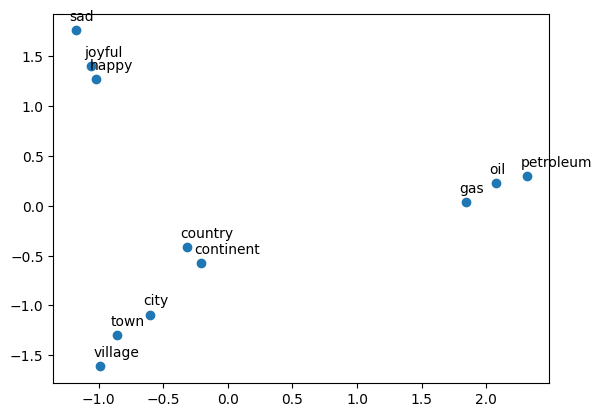

In [ ]:
# We have done the plotting for you. Just run this cell.
result = compute_pca(X, 2)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0] - 0.05, result[i, 1] + 0.1))

plt.show()

**What do you notice?**

The word vectors for 'gas', 'oil' and 'petroleum' appear related to each other,
because their vectors are close to each other.  Similarly, 'sad', 'joyful'
and 'happy' all express emotions, and are also near each other.

## 3 Concluding remarks

* To try more analogies with word2vec head over to https://rare-technologies.com/word2vec-tutorial/

* A cool way to interact with Word2Vec is by using Tensorflow's [Embedding Projector](http://projector.tensorflow.org/)